**Table of Contents/Figures** - 

    1) Bar Graph for Full Game Passes
    2) Bar Graph for First & Second Half Passes
    3) Calculate and Visual for Passses Completed vs Incomplete - Per Player 
    4) Calculate and Visual for Passses Completed vs Incomplete - Per Player (Using Dot Plots)
    5) Flow Chart - First and Second Half
    6) Heatmap Position - Where Most Passes Occurred(Starting Point of the Pass)
    7) EVERY PASS IN THE GAME - Starting Point 
    8) ConvexHull - Region Covered Per Player
    9) Passing Plot Per Player - Starting Point to End Point (Arrow)
 

# I - Import Libraries & Data

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
import seaborn as sns


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


from mplsoccer import Pitch
from mplsoccer import VerticalPitch
from mplsoccer.utils import FontManager



import cmasher as cmr


import plotly.express as px
import plotly.graph_objects as go

### Load First and Second Half Passing

In [86]:
#load data and create dataframes
df = pd.read_csv('Desktop\\HD_EventData.csv')
df2 = pd.read_csv('Desktop\\HD_EventData_2half.csv')

### Scale the passes to match StatsBomb Pitch

In [87]:
#scaling the x axis to match the Statsbomb pitch
df['X'] = df['X'] * 1.2
df['X2'] = df['X2'] * 1.2

df['Y'] = df['Y'] * .8
df['Y2'] = df['Y2'] * .8

df

Team  Half Player  Type     Subtype      X     Y     X2    Y2
0    Home     1     31  Pass   Completed   60.0  40.0   50.4  33.6
1    Home     1     36  Pass  Incomplete   50.4  33.6   92.4  67.2
2    Home     1     39  Pass   Completed   81.6  62.4   73.2  60.0
3    Home     1     60  Pass   Completed   74.4  60.8   54.0  60.0
4    Home     1     25  Pass   Completed   52.8  59.2   45.6  68.0
..    ...   ...    ...   ...         ...    ...   ...    ...   ...
163  Home     1     25  Pass   Completed   32.4  32.0   54.0   2.4
164  Home     1     65  Pass   Completed   70.8  15.2   66.0  33.6
165  Home     1     60  Pass   Completed   64.8  35.2   96.0  74.4
166  Home     1     39  Pass   Completed  105.6  68.0   88.8  60.0
167  Home     1     36  Pass   Completed   88.8  55.2  100.8  74.4

[168 rows x 9 columns]

In [88]:
#scaling the x axis to match the Statsbomb pitch
df2['X'] = df2['X'] * 1.2
df2['X2'] = df2['X2'] * 1.2

df2['Y'] = df2['Y'] * .8
df2['Y2'] = df2['Y2'] * .8
df2

Team  Half Player  Type     Subtype     X     Y    X2    Y2
0    Home     2     31  Pass   Completed  60.0  40.0  82.8  44.0
1    Home     2     25  Pass   Completed  84.0  44.0  74.4  44.0
2    Home     2     36  Pass   Completed  73.2  44.0  84.0  44.0
3    Home     2     25  Pass   Completed  84.0  42.4  75.6  38.4
4    Home     2     60  Pass   Completed  75.6  37.6  91.2  27.2
..    ...   ...    ...   ...         ...   ...   ...   ...   ...
170  Home     2     31  Pass   Completed  30.0  17.6  26.4  49.6
171  Home     2     33  Pass  Incomplete  25.2  53.6   9.6  52.0
172  Home     2     65  Pass   Completed  50.4  50.4  39.6  43.2
173  Home     2     30  Pass   Completed  40.8  42.4  40.8  30.4
174  Home     2     17  Pass   Completed  32.4  27.2  13.2  25.6

[175 rows x 9 columns]

### Merge datasets together

In [89]:
#merge the two csv files

frames = [df,df2]

df_merged = pd.concat(frames)

In [90]:
df_merged['Half'] = pd.to_numeric(df_merged['Half'])

## 1) Bar Graph for Full Game Passes

Completed     286
Incomplete     57
Name: Subtype, dtype: int64


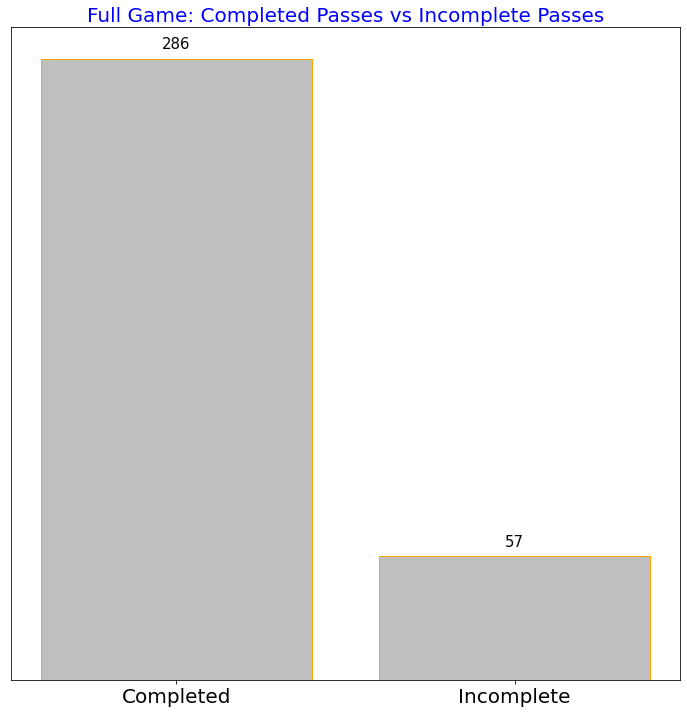

In [52]:
#count completed vs incomplete passes
passing = df_merged['Subtype'].value_counts()

#print number of passes
print(passing)

#plot title and bar graph

plt.figure(1, figsize=(12,12))
plt.title('Full Game: Completed Passes vs Incomplete Passes', color = 'b', fontsize = 20)
plt.bar(passing.index, passing.values, color=(0.5, 0.5, 0.5, 0.5),  edgecolor='orange')
plt.xticks(fontsize = 20)
plt.yticks([])


for x,y in zip(passing.index,passing.values):

    
    #plot the label with a comma for legibility
    label = (y)

    plt.annotate(label, # this is the text ^
                 (x,y), # this is the point to label 
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize = 15, color = '#050505')

plt.show()

## 2) Bar Graph for First & Second Half Passes

In [8]:
def passing(passing_half, ax):
    
    
    passing_cal = df_merged[df_merged['Half'] == passing_half]
    passing_cal = passing_cal['Subtype'].value_counts()
    

    #plot 
    ax.bar(passing_cal.index, passing_cal.values, color=(0.5, 0.5, 0.5, 0.5),  edgecolor='orange')
   

    #annotate plot 1 with number of complete vs incomplete passes
    for x,y in zip(passing_cal.index,passing_cal.values):


        #plot the label with a comma for legibility
        label = (y)

        ax.annotate(label, # this is the text ^
                     (x,y), # this is the point to label 
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center', fontsize = 12)
    
    
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

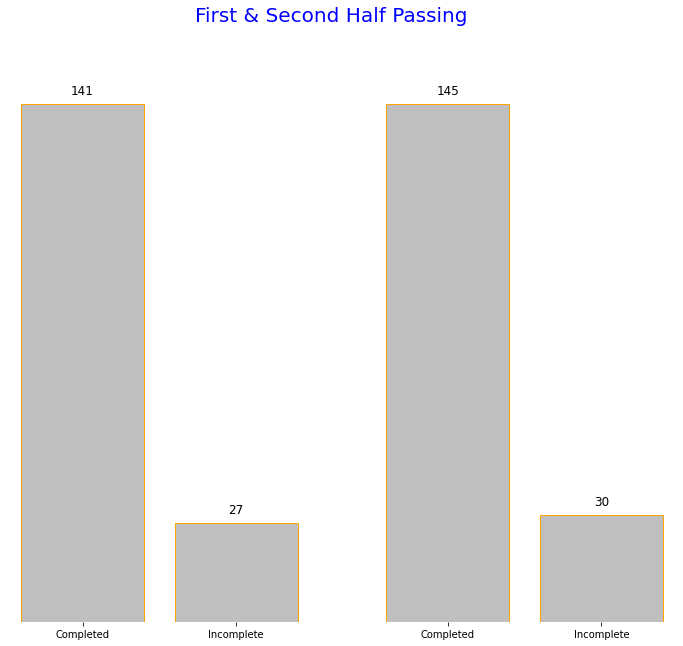

In [9]:
#assign 2 subplots 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,10))
fig.suptitle('First & Second Half Passing',ha='center',color = 'Blue',fontsize=20,va='top')



halfs = [1, 2]

col=0
for half in halfs:
    passing(half, ax[col])
    col=col+1


## 3) Calculate and Visual for Passses Completed vs Incomplete - Per Player 

In [12]:
def player_passing(passing_half, subtype, ax):

    
    player = df_merged[(df_merged['Half'] == passing_half)& (df_merged['Subtype'] == subtype)]
    total_passes = player.groupby('Player').agg({'Type':'count'})
    
    #plot 
    ax.bar(total_passes.index, total_passes['Type'], color=(0.5, 0.5, 0.5, 0.5),  edgecolor='orange')
   

    #annotate plot 1 with number of complete vs incomplete passes
    for x,y in zip(total_passes.index,total_passes['Type'].values):


        #plot the label with a comma for legibility
        label = (y)

        ax.annotate(label, # this is the text ^
                     (x,y), # this is the point to label 
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center', fontsize = 12)
    
    
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


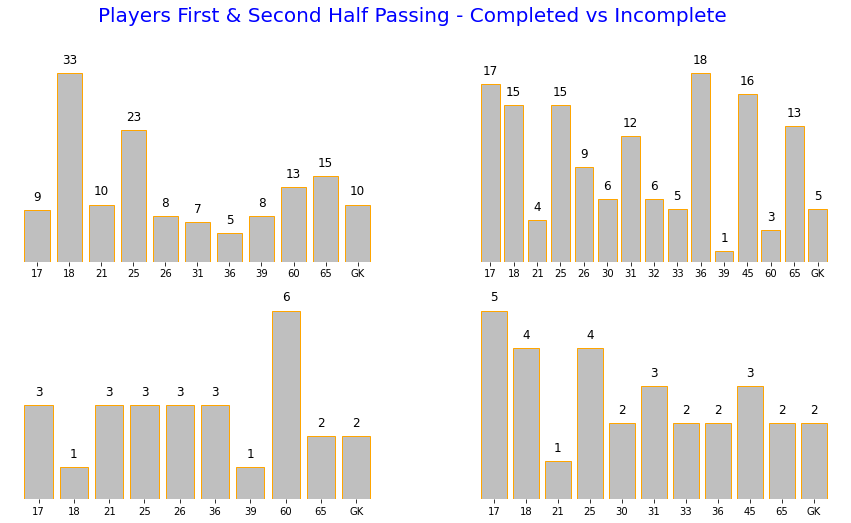

In [13]:
#assign 2 subplots 
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,8))
fig.suptitle('Players First & Second Half Passing - Completed vs Incomplete',ha='center',color = 'Blue',fontsize=20,va='top')
 


half_1 = {1:'Completed', 
         2:'Completed'}

half_2 = {1:'Incomplete', 
         2:'Incomplete'}

halfs = [half_1, half_2]

#start at zero for the row 
row = 0

#create list halfs above with the 2 dicts
for half in halfs:
    col=0
    
    #for loop for half played and completion type
    for half,subtype in half.items():
        
        #pass through the half and subtype that we just looped through - called it the same parameters as the function for simplicity
        #loop through the row and column of subplots
        player_passing(half, subtype, ax[row][col])
        col=col + 1
    row = row + 1


### Calculate Passses Completed vs Incomplete - Per Player

In [14]:
playerss = df_merged[['Player', 'Half', 'Type', 'Subtype']]

passing_sorted = playerss.groupby(['Player','Half','Subtype']).count().reset_index()
passing_sorted[passing_sorted['Half'] ==1]


passing_sorted

Player  Half     Subtype  Type
0      17     1   Completed     9
1      17     1  Incomplete     3
2      17     2   Completed    17
3      17     2  Incomplete     5
4      18     1   Completed    33
5      18     1  Incomplete     1
6      18     2   Completed    15
7      18     2  Incomplete     4
8      21     1   Completed    10
9      21     1  Incomplete     3
10     21     2   Completed     4
11     21     2  Incomplete     1
12     25     1   Completed    23
13     25     1  Incomplete     3
14     25     2   Completed    15
15     25     2  Incomplete     4
16     26     1   Completed     8
17     26     1  Incomplete     3
18     26     2   Completed     9
19     30     2   Completed     6
20     30     2  Incomplete     2
21     31     1   Completed     7
22     31     2   Completed    12
23     31     2  Incomplete     3
24     32     2   Completed     6
25     33     2   Completed     5
26     33     2  Incomplete     2
27     36     1   Completed     5
28     36     1  Incomplete     3
29     36     2   Completed    18
30     36     2  Incomplete     2
31     39     1   Completed     8
32     39     1  Incomplete     1
33     39     2   Completed     1
34     45     2   Completed    16
35     45     2  Incomplete     3
36     60     1   Completed    13
37     60     1  Incomplete     6
38     60     2   Completed     3
39     65     1   Completed    15
40     65     1  Incomplete     2
41     65     2   Completed    13
42     65     2  Incomplete     2
43     GK     1   Completed    10
44     GK     1  Incomplete     2
45     GK     2   Completed     5
46     GK     2  Incomplete     2

### 4) Completed vs Incomplete - Per Player (Using Dot Plots)

In [15]:
players = ['Player 17', 'Player 18', 'Player 21', 
           'Player 25', 'Player 26', 'Player 31', 'Player 36', 'Player 39', 'Player 60', 'Player65', 'GK']

playerss = ['Player 17', 'Player 18', 'Player 21', 
           'Player 25', 'Player 26', 'Player 36', 'Player 39', 'Player 60', 'Player65', 'GK']


completed_passes1 = passing_sorted[(passing_sorted['Half'] == 1) & (passing_sorted['Subtype'] == 'Completed')]
incomplete_passes1 = passing_sorted[(passing_sorted['Half'] == 1) & (passing_sorted['Subtype'] == 'Incomplete')]




fig = go.Figure()

#scatter for Complete passes
fig.update_traces(textposition='top center')
fig.add_trace(go.Scatter(x = players, y = completed_passes1['Type'].values,
                         marker=dict(color="orange", size=12),mode="markers",
                         name="Completed",))

#scatter for Inomplete passes
fig.add_trace(go.Scatter(x = playerss, y = incomplete_passes1['Type'].values,
                         marker=dict(color="black", size=12),
                         mode="markers",
                         name="Incomplete",))


fig.update_layout(title="First half - Completed vs Incomplete Passes",
                  xaxis_title="Player",
                  yaxis_title="Number of Passes")




#fig = px.scatter(df_merged, x = total_passes['Type'], y = total_passes.index)
fig.show()

In [16]:
players = ['Player 17', 'Player 18', 'Player 21', 
           'Player 25', 'Player 26','Player 30', 'Player 31', 'Player 32','Player 33', 'Player 36', 'Player 39','Player 45', 'Player 60', 'Player65', 'GK']

playerss = ['Player 17', 'Player 18', 'Player 21', 
           'Player 25','Player 30', 'Player 31', 'Player 33', 
           'Player 36', 'Player 45', 'Player65', 'GK']



completed_passes2 = passing_sorted[(passing_sorted['Half'] == 2) & (passing_sorted['Subtype'] == 'Completed')]
incomplete_passes2 = passing_sorted[(passing_sorted['Half'] == 2) & (passing_sorted['Subtype'] == 'Incomplete')]





fig = go.Figure()

#scatter for Complete passes
fig.add_trace(go.Scatter(x = players, y = completed_passes2['Type'].values,
                         marker=dict(color="orange", size=12),mode="markers",
                         name="Completed",))

fig.add_trace(go.Scatter(x = playerss, y = incomplete_passes2['Type'].values,
                         marker=dict(color="black", size=12),mode="markers",
                         name="Incomplete",))



fig.update_layout(title="Second half - Completed vs Incomplete Passes",
                  xaxis_title="Player",
                  yaxis_title="Number of Passes")

#fig = px.scatter(df_merged, x = total_passes['Type'], y = total_passes.index)
fig.show()

In [126]:
first_half = df_merged[df_merged['Half'] == 1]
first_half
second_half = df_merged[df_merged['Half'] == 2]
second_half

Team  Half Player  Type     Subtype     X     Y    X2    Y2
0    Home     2     31  Pass   Completed  60.0  40.0  82.8  44.0
1    Home     2     25  Pass   Completed  84.0  44.0  74.4  44.0
2    Home     2     36  Pass   Completed  73.2  44.0  84.0  44.0
3    Home     2     25  Pass   Completed  84.0  42.4  75.6  38.4
4    Home     2     60  Pass   Completed  75.6  37.6  91.2  27.2
..    ...   ...    ...   ...         ...   ...   ...   ...   ...
170  Home     2     31  Pass   Completed  30.0  17.6  26.4  49.6
171  Home     2     33  Pass  Incomplete  25.2  53.6   9.6  52.0
172  Home     2     65  Pass   Completed  50.4  50.4  39.6  43.2
173  Home     2     30  Pass   Completed  40.8  42.4  40.8  30.4
174  Home     2     17  Pass   Completed  32.4  27.2  13.2  25.6

[175 rows x 9 columns]

## 5) Flow Chart - First and Second Half

Text(0.5, 1.0, 'Houston Dynamo  vs FC Dallas - First Half')

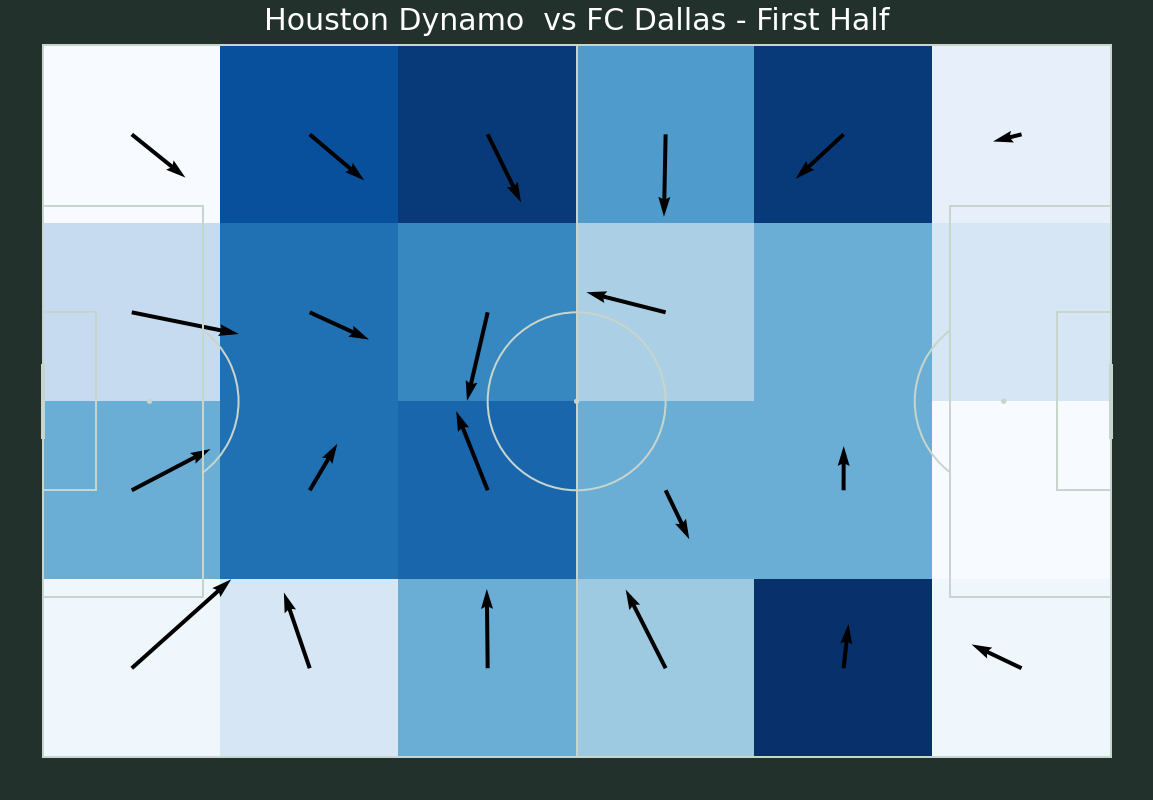

In [18]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)

team1 = 'Houston Dynamo'
team2 = 'FC Dallas'


fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square


bs_heatmap = pitch.bin_statistic(df_merged.X, df_merged.Y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')


# plot the pass flow map with a custom color map and the arrows scaled by the average pass length
# the longer the arrow the greater the average pass length in the cell


#rey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(first_half.X, first_half.Y, first_half.X2, first_half.Y2, color='black',
                arrow_type='scale', arrow_length=15, bins=bins, ax=ax)
ax.set_title(f'{team1}  vs {team2} - First Half', fontsize=30, pad=-20, color = 'w')

Text(0.5, 1.0, 'Houston Dynamo  vs FC Dallas - Second Half')

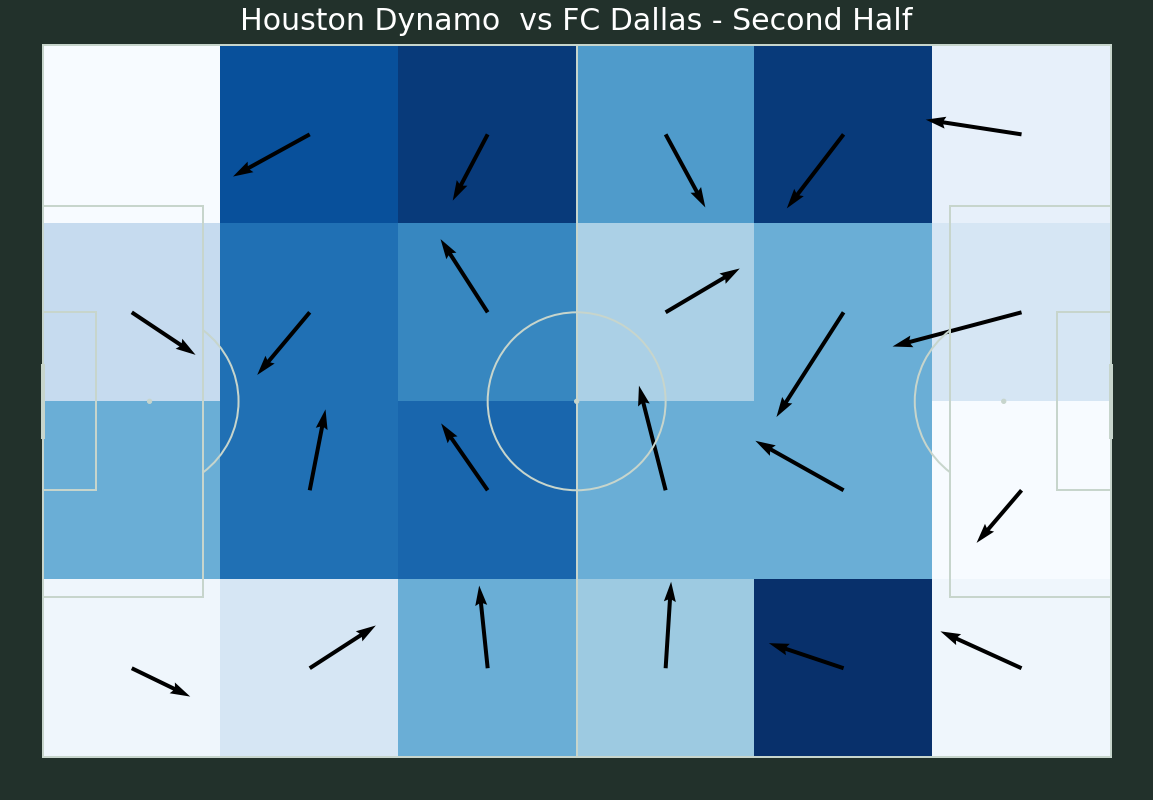

In [19]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)

team1 = 'Houston Dynamo'
team2 = 'FC Dallas'


fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square


bs_heatmap = pitch.bin_statistic(df_merged.X, df_merged.Y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')


# plot the pass flow map with a custom color map and the arrows scaled by the average pass length
# the longer the arrow the greater the average pass length in the cell


#rey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(second_half.X, second_half.Y, second_half.X2, second_half.Y2, color='black',
                arrow_type='scale', arrow_length=15, bins=bins, ax=ax)
ax.set_title(f'{team1}  vs {team2} - Second Half', fontsize=30, pad=-20, color = 'w')

In [20]:
# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

### 6) First Half Heatmap Position - Where Most Passes Occurred(Starting Point of the Pass)

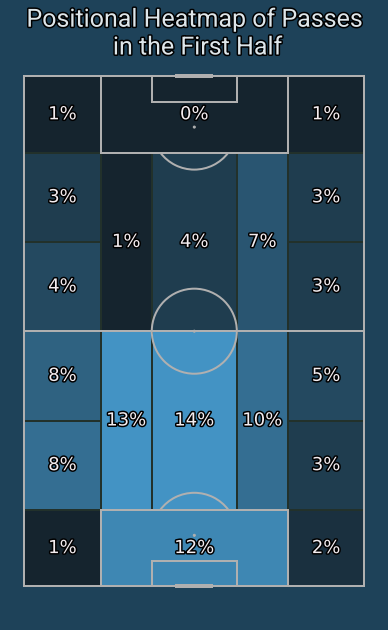

In [21]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(first_half.X, first_half.Y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.5, "Positional Heatmap of Passes\n in the First Half", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)


plt.show()  # If you are using a Jupyter notebook you do not need this line

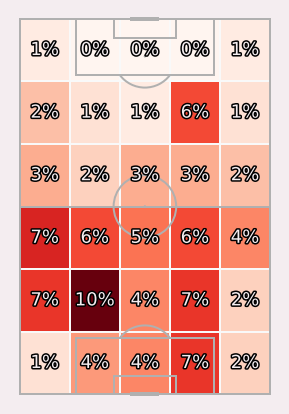

In [22]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(first_half.X, first_half.Y, statistic='count', bins=(6, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

### Second Half Heatmap Position - Where Most Passes Occurred(Starting Point of the Pass)

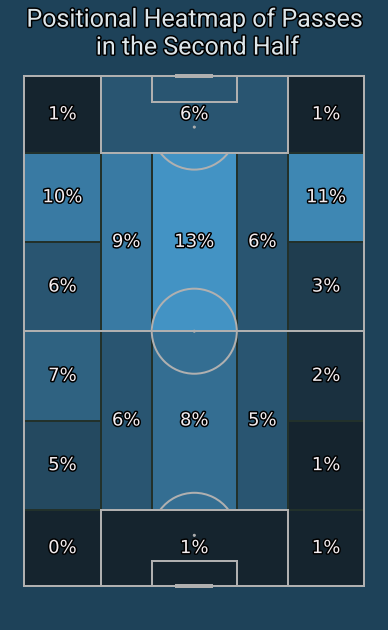

In [23]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                   ### First Half Heatmap Position - Where Most Passes Occurred(Starting Point of the Pass)   title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(second_half.X, second_half.Y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['title'].text(0.5, 0.5, "Positional Heatmap of Passes\n in the Second Half", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)


plt.show()

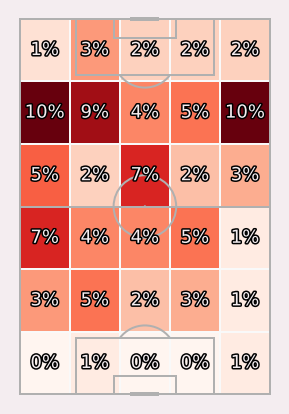

In [24]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#f4edf0')
fig, ax = pitch.draw(figsize=(4.125, 6))
fig.set_facecolor('#f4edf0')
bin_statistic = pitch.bin_statistic(second_half.X, second_half.Y, statistic='count', bins=(6, 5), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

###  7) EVERY PASS IN THE GAME - Starting Point 

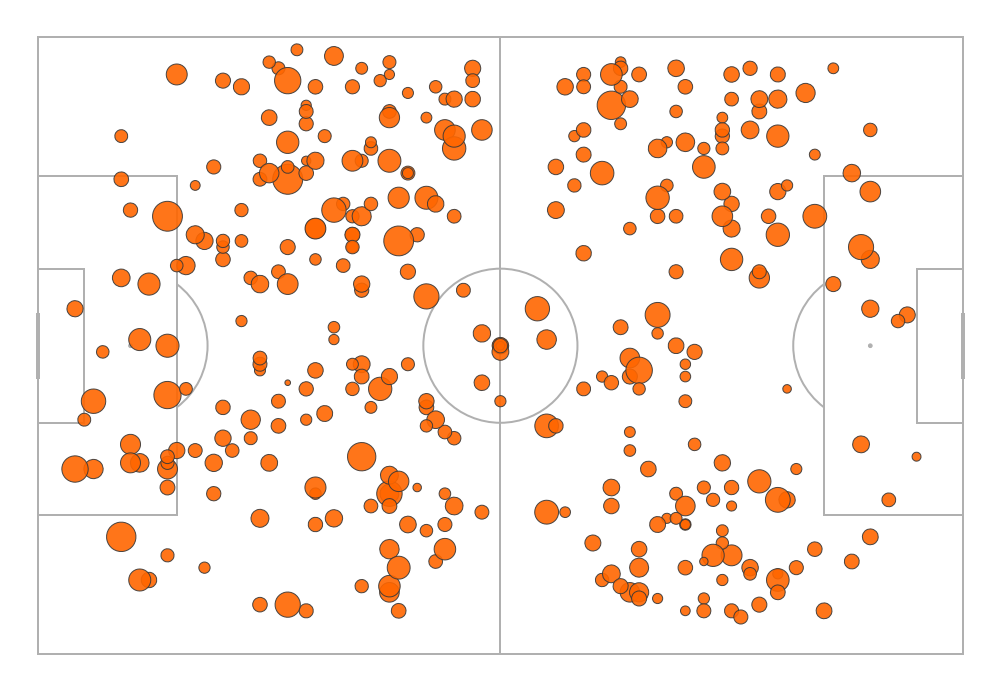

In [25]:
pitch = Pitch()
fig, ax = pitch.draw(figsize=(14, 12))
angle, distance = pitch.calculate_angle_and_distance(df_merged.X, df_merged.Y,
                                                     df_merged.X2, df_merged.Y2,
                                                     standardized=False, degrees=True)
sc = pitch.scatter(df_merged.X, df_merged.Y, rotation_degrees=angle,
                   c='#FF6600',  # color for scatter in hex format
                   edgecolors='#383838', alpha=0.9,
                   s=(distance / distance.max()) * 900, ax=ax)

In [156]:
#first_half['Player'] = first_half['Player'].replace(['GK'], '1')

starters = first_half['Player'].unique()
starters = starters[0:12]
starters = list(starters)
starters

[31, 36, 39, 60, 25, 18, 26, 1, 17, 21, 65]

## 8) ConvexHull - Region Covered Per Player

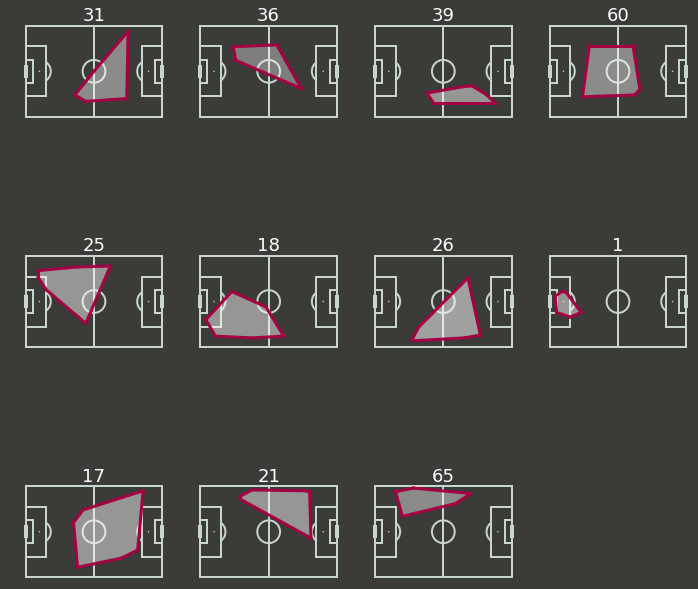

In [167]:
from scipy.spatial import ConvexHull




fig, axes = plt.subplots(3,4,figsize=(12,12))
fig.set_facecolor('#3b3b38')
axes.flat[-1].set_visible(False)


pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#3b3b38', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)



for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor('#3b3b38')
        pitch.draw(ax=ax)

        df = first_half[(first_half['Player'] == starters[i])]
        #df = first_half[(np.abs(stats.zscore(first_half[['X','Y']])) < .5)]

        points = df[['X','Y']].values
        hull = ConvexHull(df[['X','Y']])

        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], '#A50044',lw=3)
            ax.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.1)
            ax.set_ylabel(ylabel=' ')


        ax.set_title(label=starters[i],c='white',va='center',ha='center',fontsize=18,fontfamily='Andale Mono')
    except:
        pass

## 9) Passing Plot Per Player - Starting Point to End Point (Arrow)

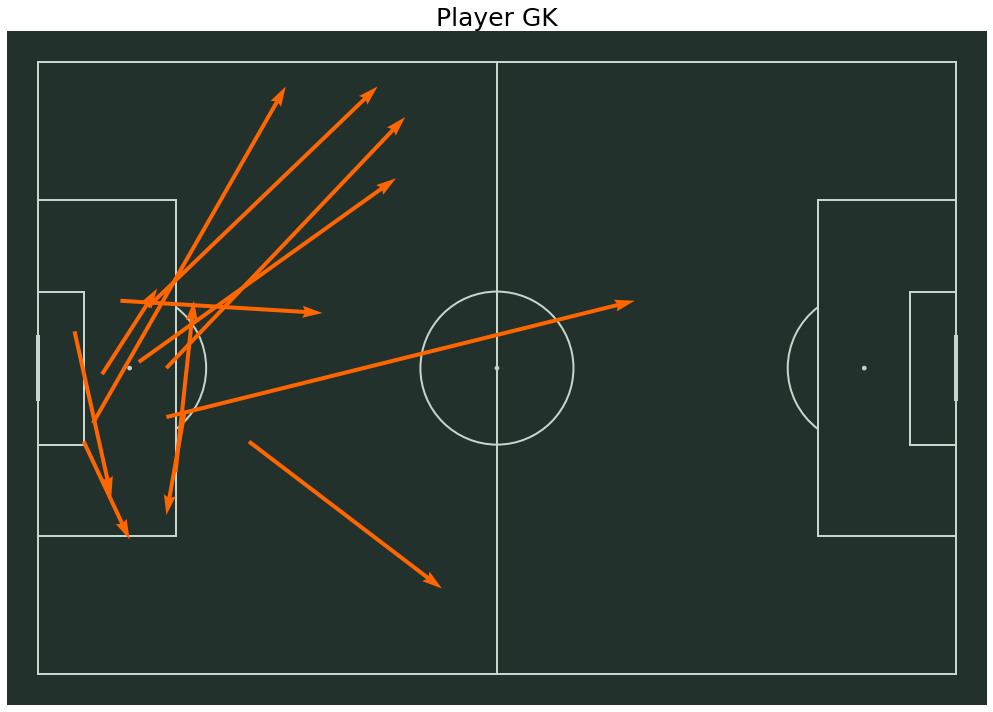

In [73]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== 'GK']


ax.set_title(f'Player GK', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)



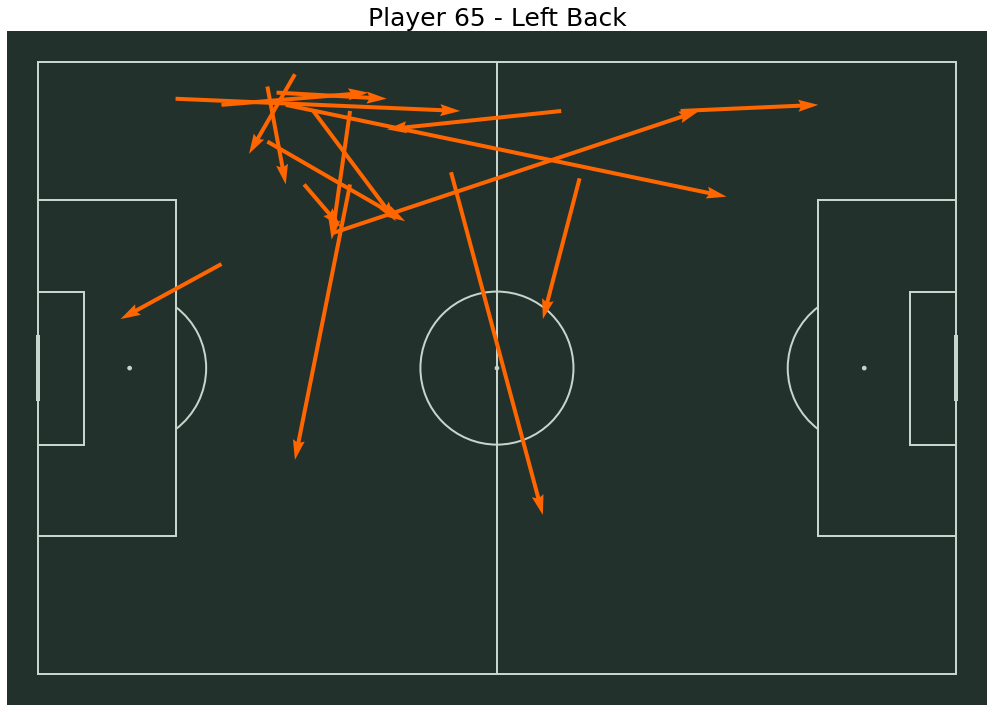

In [74]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '65']

ax.set_title(f'Player 65 - Left Back', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

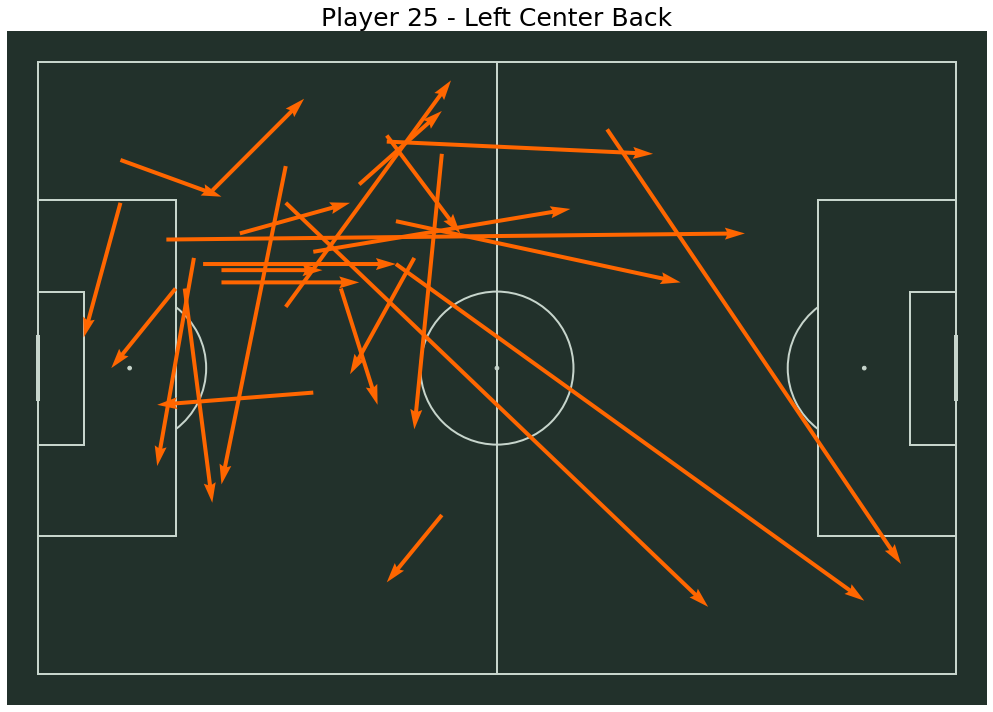

In [75]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '25']

ax.set_title(f'Player 25 - Left Center Back', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

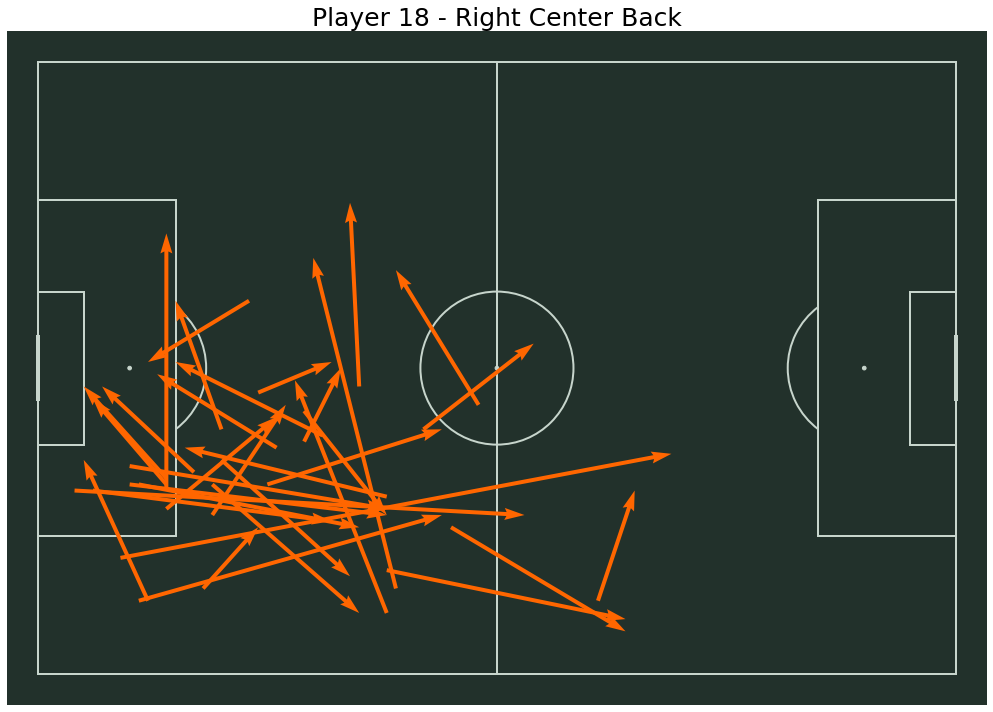

In [76]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '18']

ax.set_title(f'Player 18 - Right Center Back', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

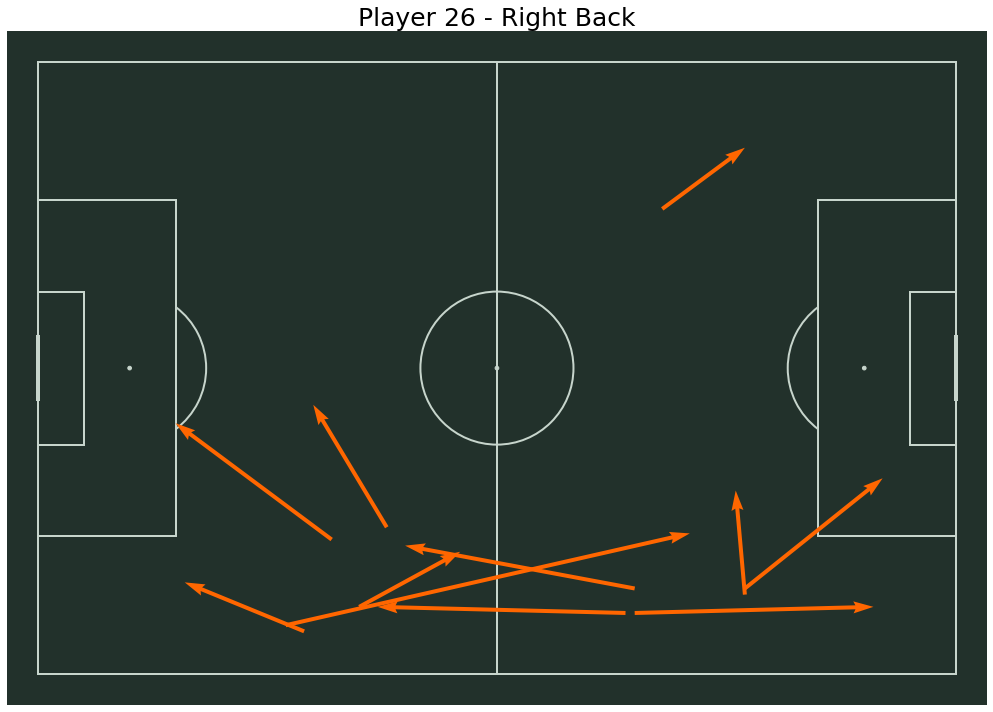

In [84]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '26']

ax.set_title(f'Player 26 - Right Back', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

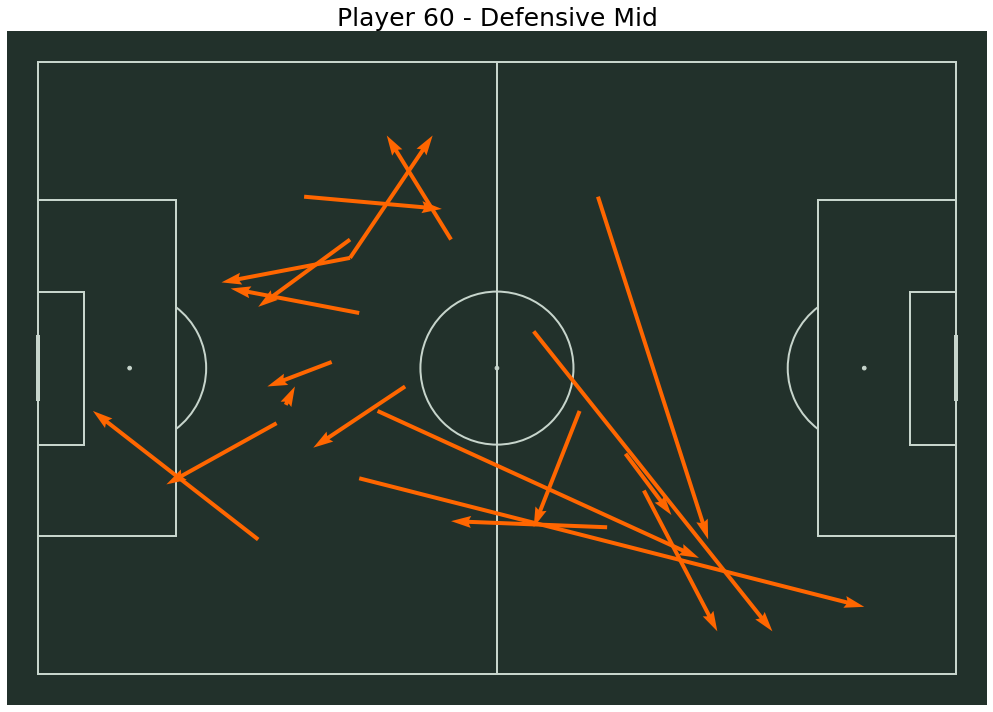

In [78]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '60']

ax.set_title(f'Player 60 - Defensive Mid', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

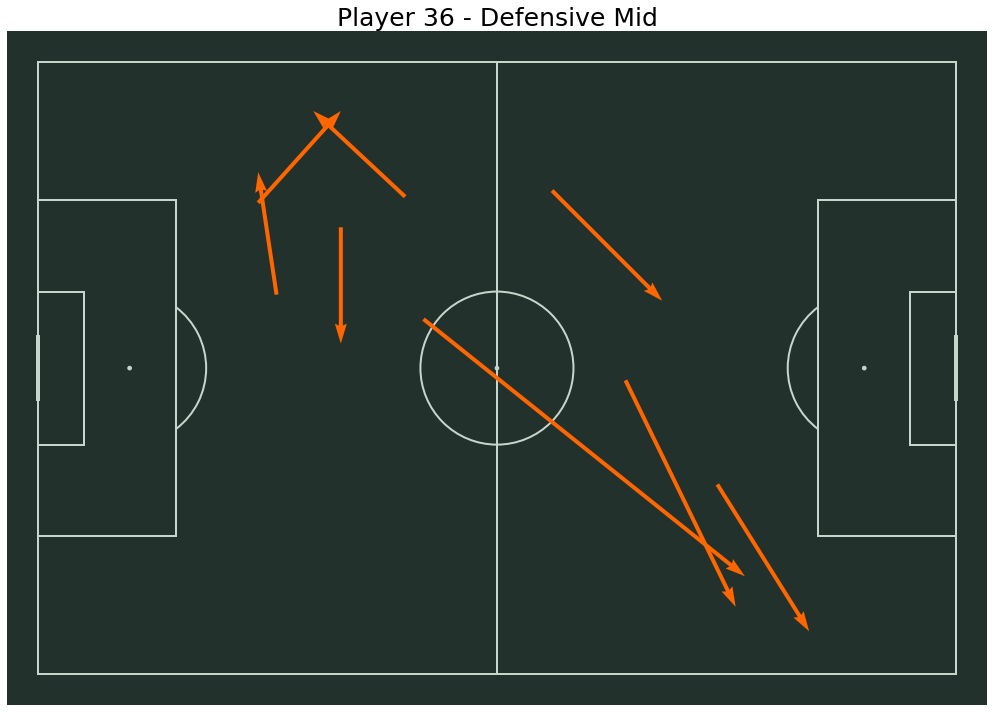

In [79]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '36']

ax.set_title(f'Player 36 - Defensive Mid', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

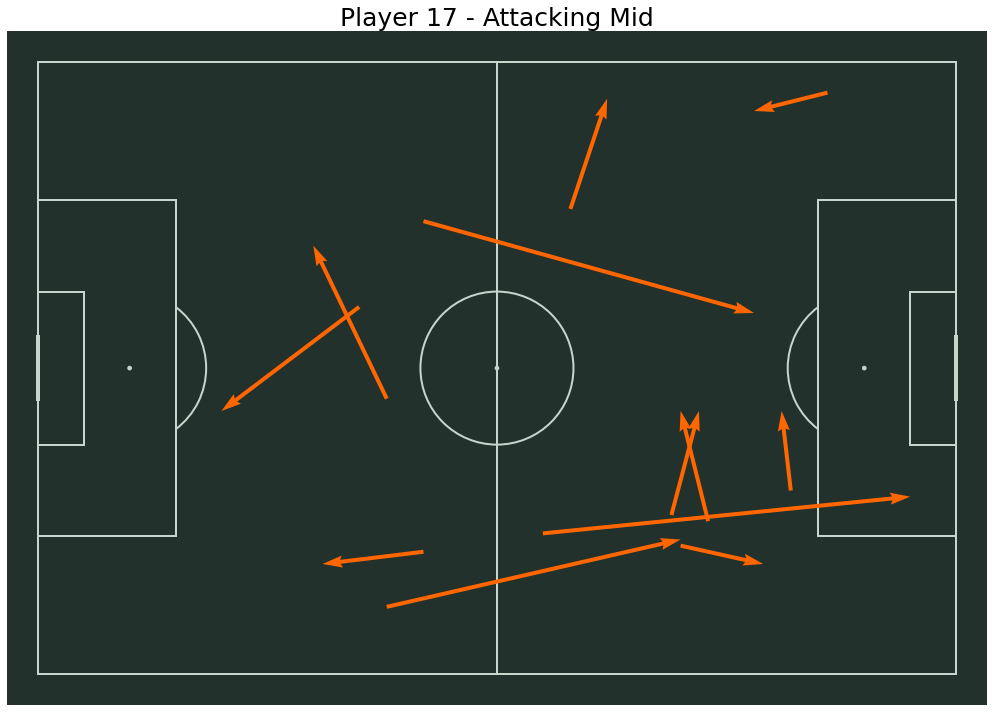

In [80]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '17']

ax.set_title(f'Player 17 - Attacking Mid', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

Text(0.5, 1.0, 'Player 21 - Left Winger')

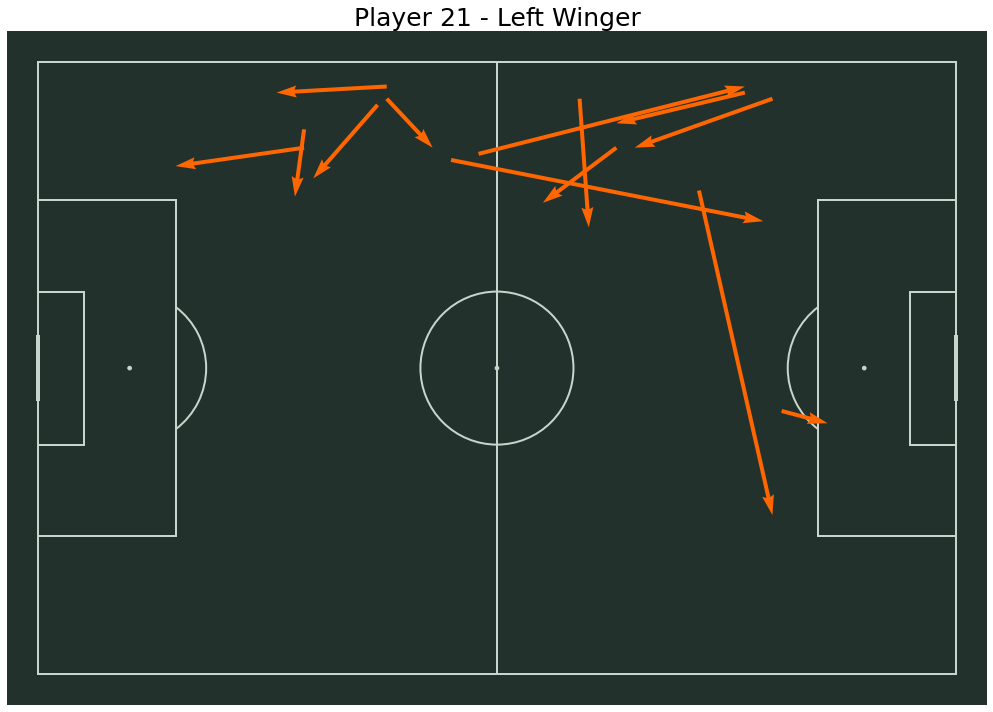

In [81]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '21']



pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

ax.set_title(f'Player 21 - Left Winger', fontsize=25)

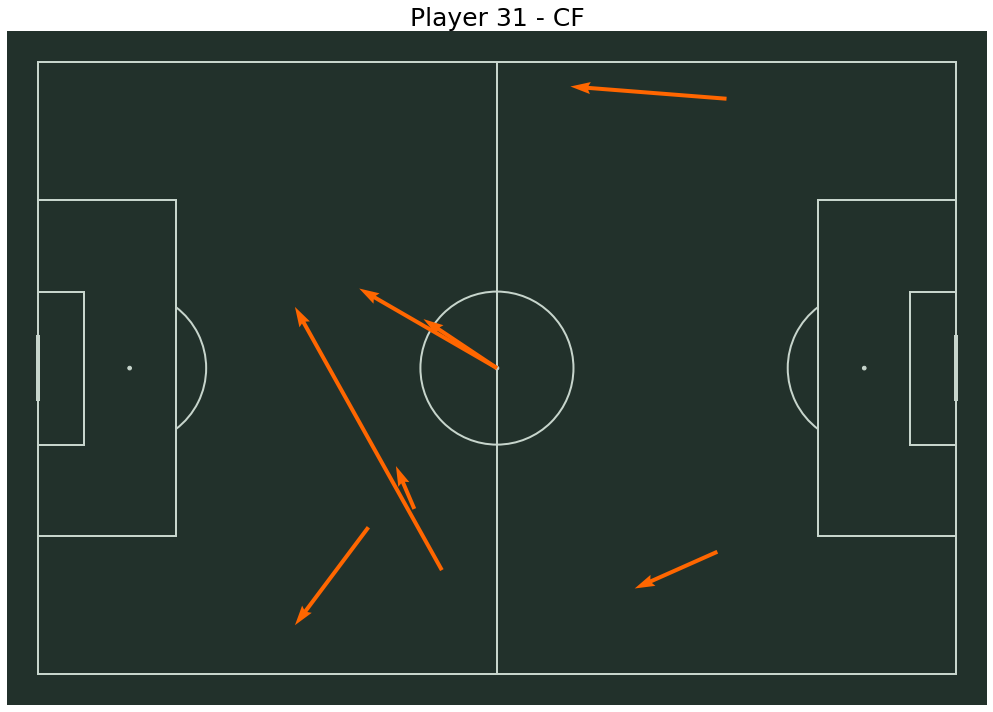

In [82]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '31']

ax.set_title(f'Player 31 - CF', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)

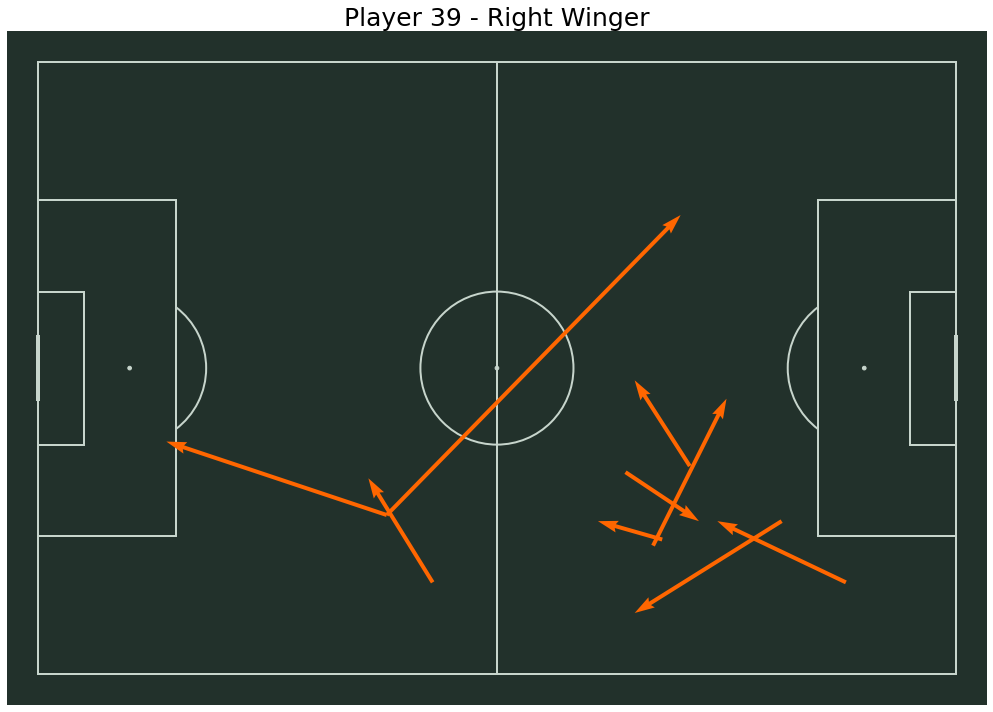

In [83]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(18, 10))


player_number = first_half[first_half['Player']== '39']

ax.set_title(f'Player 39 - Right Winger', fontsize=25)
pitch.arrows(player_number.X, player_number.Y,
                     player_number.X2, player_number.Y2,
                     color='#FF6600',ax=ax)